Dieses Notebook enthält alle im Workshop erziehlten Ergebnisse.

In [1]:
# Das ist ein Kommentar


print("Hello World")

# Zuweisungen und Berechnungen
a = 10
b = 20.5
c = a + b + 3**2


import math
print("Die Wurzel aus ", c, "ist ", math.sqrt(c))

while True: # Endlosschleife
    x = input("Your name? ")
    if x == "q":
        break # finish loop
    print("Hello ", x)

Hello World
Die Wurzel aus  39.5 ist  6.284902544988268


Your name?  Carsten


Hello  Carsten


Your name?  q


# Interaktive Demo


das ist normaler Text

das **fett**

- hallo
- Welt
   - $\alpha^2$

In [7]:
import numpy as np
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
import matplotlib.pyplot as plt

# Diese Erweiterung erlaubt den "magischen" Kommentar `##:`
%load_ext ipydex.displaytools

# %matplotlib inline  # → statische Grafiken
# → interaktive Grafiken (Zoomen, Verschieben)
%matplotlib widget

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


# Numerische Daten erzeugen und visualisieren

x := 
array([-3.        , -2.73469388, -2.46938776, -2.20408163, -1.93877551,
       -1.67346939, -1.40816327, -1.14285714, -0.87755102, -0.6122449 ,
       -0.34693878, -0.08163265,  0.18367347,  0.44897959,  0.71428571,
        0.97959184,  1.24489796,  1.51020408,  1.7755102 ,  2.04081633,
        2.30612245,  2.57142857,  2.83673469,  3.10204082,  3.36734694,
        3.63265306,  3.89795918,  4.16326531,  4.42857143,  4.69387755,
        4.95918367,  5.2244898 ,  5.48979592,  5.75510204,  6.02040816,
        6.28571429,  6.55102041,  6.81632653,  7.08163265,  7.34693878,
        7.6122449 ,  7.87755102,  8.14285714,  8.40816327,  8.67346939,
        8.93877551,  9.20408163,  9.46938776,  9.73469388, 10.        ])

---

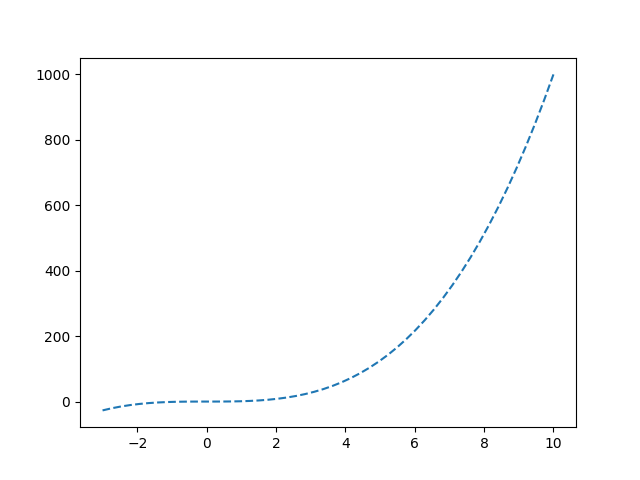

In [13]:
# Daten erzeugen
plt.figure()
x = np.linspace(-3, 10, 50) ##:
y = x**3

# Daten plotten (blau, durchgezogene Linie, und Punktmarkierung)
plt.plot(x, y, "--")

## Beispielproblem

Spannungsquelle mit Innenwiderstand wird an Diode mit bekannter Kennlinie angeschlossen. Wie viel Strom fließt?

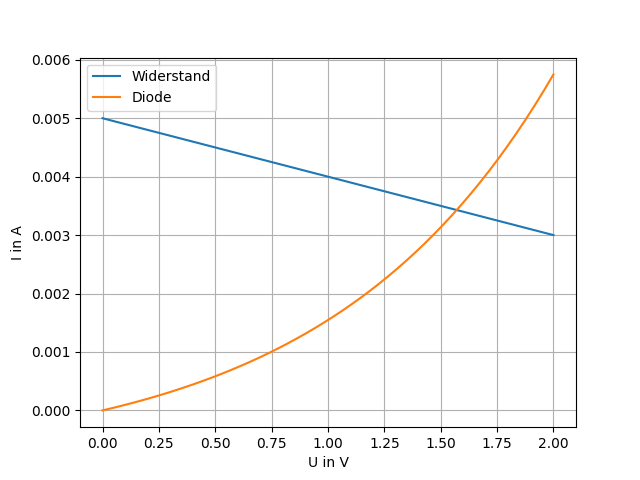

In [14]:
plt.figure()

# 50 Spannungswerte zwischen 0V und 2V
uu = np.linspace(0, 2, 50)

# Quellspannung
U_q = 5
R = 1000

i_K = U_q/R  # Kurzschlussstrom


# Strom durch einen Widerstand
ii_R = i_K - uu/R

# Strom durch eine Diode (einfaches Modell )
c = 0.0009  # Dioden-Parameter
ii_D = c*(np.exp(1*uu) - 1)


plt.plot(uu, ii_R, "-", label="Widerstand")
plt.plot(uu, ii_D, "-", label="Diode")
plt.legend()

plt.xlabel("U in V")
plt.ylabel("I in A")
plt.grid(True)

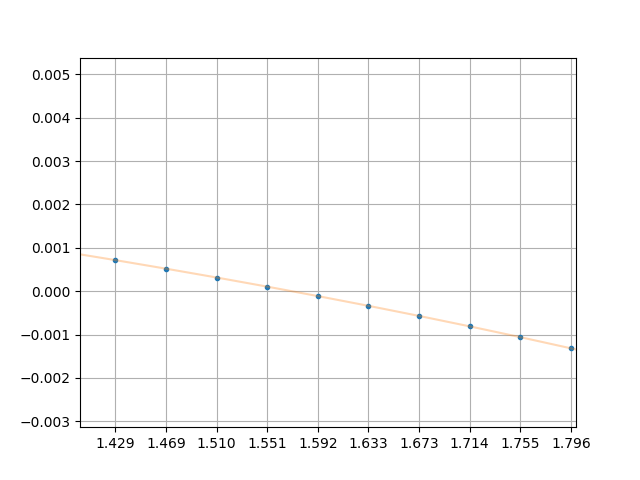

In [15]:
# Schnittpunkt grafisch bestimmen:
plt.figure()
plt.plot(uu, ii_R - ii_D, '.')
plt.plot(uu, ii_R - ii_D, '-', alpha=0.3)

plt.grid()
plt.xticks(uu)
plt.xlim(1.4, 1.8)
pass

In [19]:
# Schnittpunkt numerisch bestimmen:
# Ansatz:
# Gleichung "nach 0 umstellen": i_R - i_D = 0
# rechte Seite der Gleichung zurückgeben

def equation_rhs(uu):

    # Strom durch einen Widerstand
    ii_R = i_K - uu/R
    # Strom durch eine Diode (einfaches Modell )
    ii_D = c*(np.exp(uu) - 1)

    return ii_R - ii_D

# Funktion so lange durch "geeignetes Probieren mit verschiedenen uu-Werten" aufrufen bis sie 0 ergibt.

from scipy.optimize import fsolve

sol = fsolve(equation_rhs, 1) ##:



sol := array([1.57075393])

---

In [20]:
equation_rhs(sol)

array([0.])

# Numerisches Rechnen (lineare Algebra)

Hier wird das Modul `numpy` benuzt. Siehe oben: `import numpy as np`.

In [21]:
# Definieren eines 2d-Arrays (3x3-Matrix)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9.]]) ##:


# Elementweise Rechnungen

M1 = M * -10 ##:
M2 = M + 20 ##:
M3 = M**2 ##:


# Determinante

det_M = np.linalg.det(M) ##:

M := array([[1., 2., 3.],
            [4., 5., 6.],
            [7., 8., 9.]])

---

M1 := array([[-10., -20., -30.],
             [-40., -50., -60.],
             [-70., -80., -90.]])

---

M2 := array([[21., 22., 23.],
             [24., 25., 26.],
             [27., 28., 29.]])

---

M3 := array([[ 1.,  4.,  9.],
             [16., 25., 36.],
             [49., 64., 81.]])

---

---

In [22]:
# Ein bestimmtes Element adressieren (Index-Zählung beginnt bei 0)

M[0, 0] ##:
M[1, 2] ##:

# bestimmtes Element verändern:

M[1, 2] = -5

M ##:

---

---

(M) := array([[ 1.,  2.,  3.],
              [ 4.,  5., -5.],
              [ 7.,  8.,  9.]])

---

In [ ]:
# Mehrere Elemente adressieren ("indizieren")

# oberen zwei Elemente der "ersten Spalete" (Index: 0)
M[0:2, 0:1] ##:


# erste Spalte (Index 0) mit -1 multiplizieren
M[:, 0]*=0.1

M ##:

# Matrix transponieren

Q = M.T ##:


In [23]:
# Eigenwerte und Eigenvektoren bestimmen

np.set_printoptions(linewidth=270, precision=8)
eigvals, eigvects = np.linalg.eig(M)

eigvals ##:
eigvects ##:

(eigvals) := array([-0.79883211+0.j        ,  7.89941606+4.49664769j,  7.89941606-4.49664769j])

---

(eigvects) := array([[-0.79178206+0.j        , -0.2384908 +0.02107475j, -0.2384908 -0.02107475j],
                     [ 0.60674911+0.j        ,  0.31761139-0.46350282j,  0.31761139+0.46350282j],
                     [ 0.07026159+0.j        , -0.79181193+0.j        , -0.79181193-0.j        ]])

---

**Beobachtung**: Es resultieren 1 reeller Eigenwert und zwei komplexe (d.h. ein konjugiert komplexes Paar).

Nebenbemerkung zu komplexen Zahlen: Die "imaginäre Einheit" $i$ bzw. in der Elektrotechnik meist $j$ ist definiert über die Gleichung

$$
j^2 = j\cdot j= -1.
$$

Eine komplexe Zahl $z$ ist die Summe $z = a + b \cdot j$ mit $a, b \in \mathbb{R}$ (reelle Zahlen). In Python schreibt man z.B. `z = -4 + 3j`.

In [24]:
# 1. Wert
w0 = eigvals[0] ##

# 1. Spalte (-> wird ein 1d-array)
v0 = eigvects[:, 0] ##:

v0 := array([-0.79178206+0.j,  0.60674911+0.j,  0.07026159+0.j])

---

In [25]:
# Matrix-Vektor-Multiplikation:

M@v0 ##:

# Alternative Notation (rückwärtskompatibel)

np.dot(M, v0) ##:


(M@v0) := array([ 0.63250094+0.j, -0.48469067+0.j, -0.05612722+0.j])

---

(np.dot(M, v0)) := array([ 0.63250094+0.j, -0.48469067+0.j, -0.05612722+0.j])

---

In [26]:
# Prüfen ob w0 bzw. v0 wirklich Eigenwert bzw. Eigenvektor ist von M ist

w0*v0 ##:

# Es kommt das gleiche Ergebnis wie oben raus (bis auf "numerisches Rauschen"):
diff = w0*v0 - M@v0 ##:


(w0*v0) := array([ 0.63250094-0.j, -0.48469067+0.j, -0.05612722+0.j])

---

diff := array([-1.22124533e-15-0.j, -3.44169138e-15+0.j, -4.07313072e-15+0.j])

---

In [27]:
# Aufspalten in Real- und Imaginärteil

eigvals ##:

np.real(eigvals) ##:
np.imag(eigvals) ##:

(eigvals) := array([-0.79883211+0.j        ,  7.89941606+4.49664769j,  7.89941606-4.49664769j])

---

(np.real(eigvals)) := array([-0.79883211,  7.89941606,  7.89941606])

---

(np.imag(eigvals)) := array([ 0.        ,  4.49664769, -4.49664769])

---

### Lineare Gleichungssysteme lösen:


$$
\mathbf{A}\cdot\mathbf{x} = \mathbf{b}
$$

In [28]:
n = 3

A = np.random.random((n, n)) ##:
b = np.random.random(n) ##:

A := array([[0.06178043, 0.03186334, 0.02676034],
            [0.12599679, 0.25270278, 0.83847886],
            [0.32999145, 0.62735337, 0.30778347]])

---

b := array([0.94421711, 0.59866703, 0.64295298])

---

In [30]:
x = np.linalg.solve(A, b) ##:

x := array([20.0822337 , -9.86725152,  0.67008492])

---

In [31]:
# Probe:

A@x - b ##:



(A@x - b) := array([ 1.11022302e-16, -3.33066907e-16, -2.22044605e-16])

---

# Symbolisches Rechnen

Hier wird das Modul `sympy` benuzt. Siehe oben: `import sympy as sp`.

In [32]:
x1, x2 = sp.symbols("x1, x2")

f = x1**3 - 7*x1**2 + 2*x1 + 4 ##:

---

In [33]:
# 1. Ableitung

f.diff(x1)

In [34]:
# 2. Ableitung
f.diff(x1, 2) ##:

# ... ausmultipliziert:
f.diff(x1, 2).expand() ##:

---

---

---
<br><br><br>

In Jupyter-Notebooks lassen sich auch klassische **interaktive** GUI-Elemente nutzen, wie das folgende Beispiel zeigt:

## Aufgabe: Visualisierung von Taylor-Polynomen verschiedener Ordnung


<div style="font-size:150%;">

Geg:

- $f(x) = \sin(ax)$


Ges:

- grafische Darstellung der Approximation mittels sogenannter "Taylor-Polynome" $\hat f_k(x; x_0) := \sum_{i=0}^k\frac{1}{i!}\left.\frac{d^i}{dx^i} f(x)\right|_{x=x_0}$
    
</div>


In [35]:
# Vorbereitung

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from sympy import sin

# the following requires `pip install symbtools ipywidgets`
import symbtools as st
from ipywidgets import interact, interactive, fixed, interact_manual, widgets


plt.rcParams["axes.titlesize"] = "xx-large"


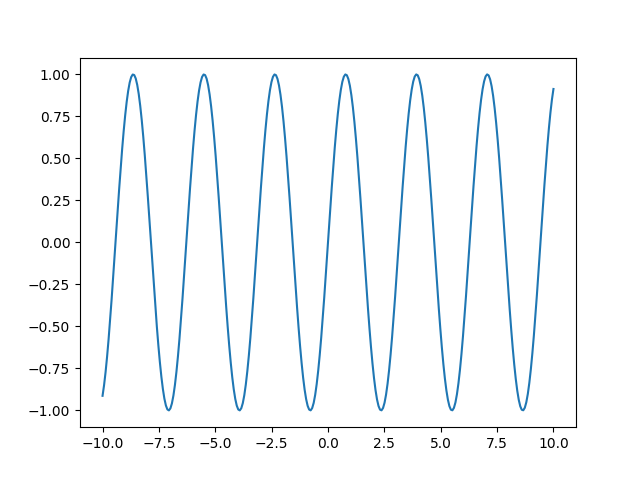

In [36]:
x, x0, a = sp.symbols("x, x0, a")

f1 = sin(a*x)# *f1
func1 = sp.lambdify((a, x), f1)  # symbolischen Ausdruck in Python-Funktion umwandeln


xx_values = np.linspace(-10, 10, 300)

a1 = 2
plt.figure()
plt.plot(xx_values, func1(a1, xx_values))



In [37]:
# Vorabbrechnung der symbolischen Ausdrücke für die Taylor-Approximationen bis zur 12. Ordnung
# (Das ist sinnvoll aus Performance-Gründen.)

taylor_expressions = []
taylor_funcs = []

Nmax = 12

for i in range(Nmax + 1):
    # taylor_expr = sp.series(f2, x, x0, n=i)
    taylor_expr = st.multi_taylor(f1, (x,), (x0, ), order=i)
    taylor_expressions.append(taylor_expr)
    taylor_funcs.append(st.expr_to_func((a, x, x0), taylor_expr.removeO()))


In [38]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [40]:
# Shift + ← bzw. → zum graduellen Verändern der Bedienelemente benutzen. 

fapp = sp.Symbol("f_approx")
n_slider = widgets.IntSlider(min=0, max=Nmax,step=1,value=1)

@interact(x01=(-4.5, 5.5, 0.2), a1=(0.1, 2.0, 0.1), n=n_slider)
def plot_func(n, x01, a1):
    plt.figure(figsize=(15, 6))
    plt.plot(xx_values, func1(a1, xx_values), "-", lw=5)  # blue line
    plt.plot(xx_values, taylor_funcs[n](a1, xx_values, x01), color="tab:orange", lw=3)
    plt.plot([x01], func1(a1, x01), "o", ms=10, color="tab:orange")
    plt.axis([-10, 10, -1.3, 1.3])
    
    # Der folgende Code zeigt nützliche Informationen, verlangsamt aber die Visualisierung
    if 1:
        expr0 = taylor_expressions[n].subs([(x0, x01), (a, a1)])
        expr1 = st.simplify_numbers(sp.expand(expr0))
        eq = sp.Equality(fapp, expr1)
        plt.title(f"Taylor-Approximation von $f(x) = \\sin(ax)$ mit a={a1}\n${sp.latex(eq)}$")
        

    plt.show()


interactive(children=(IntSlider(value=1, description='n', max=12), FloatSlider(value=0.5, description='x01', m…

In [ ]:
# Einfacheres Beispiel für interact: Slider-Wert mit 5 multiplizieren und ausgeben

@interact(n=(0, 7, 1))
def print_func(n):
    y = 5*n
    print(y)
